# Code used to make figures in that section

In [2]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pwd

'/Users/dsluse/work/git_projects/SPAT0002-1/Ongoing/05-MLE_and_regression'

(1.198395526799567, 6.891757300902919)

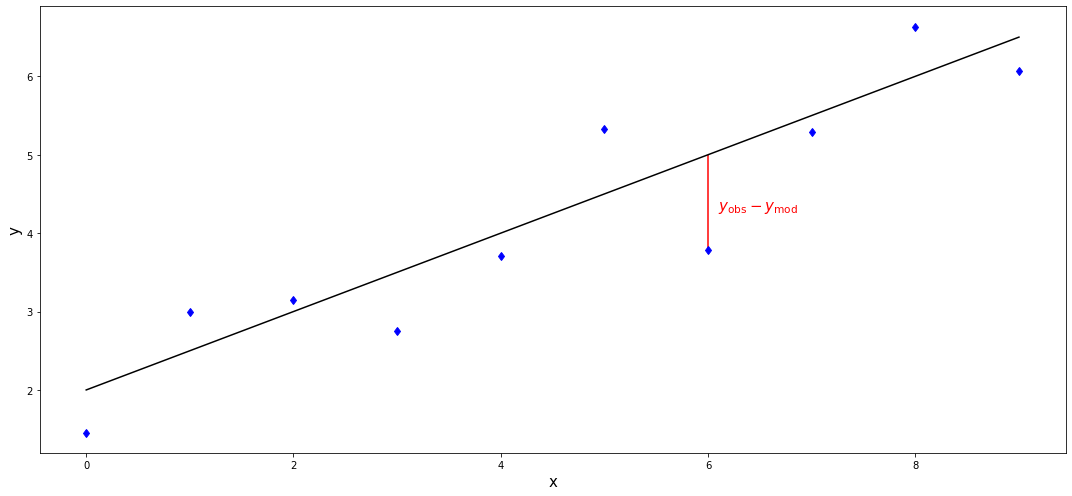

In [13]:
# Illustration of the chi2 
x = np.arange(10)
y = 2 + 0.5 * x
np.random.seed(123)
yerr = y + 0.5 * np.random.randn(10)
f = plt.figure(figsize=(15,7))
plt.errorbar(x, yerr, color='blue', ls='', marker='d')
plt.plot(x, y, color='black')
plt.vlines(x[6], y[6], yerr[6],  color='red')
qq = plt.text(x[6]+0.1, yerr[6]+0.5, r'$y_{\rm obs}-y_{\rm mod}$', fontsize=15, color='red')
plt.ylabel('y', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.tight_layout()
#plt.ylim()
#plt.savefig('../Figures/fig_least_square.png')

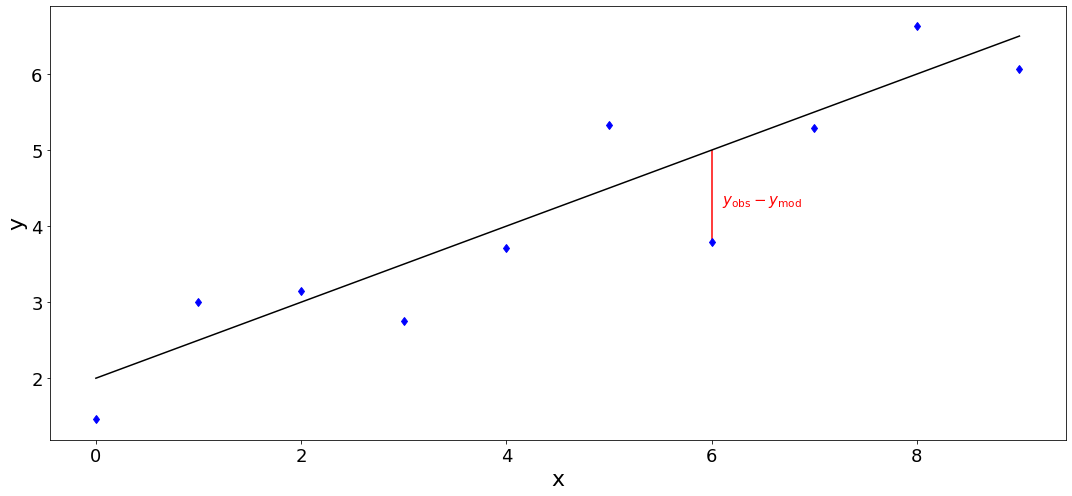

In [15]:
x = np.arange(10)
y = 2 + 0.5 * x
np.random.seed(123)

yerr = y + 0.5 * np.random.randn(10)
f, ax = plt.subplots(figsize=(15,7))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.errorbar(x, yerr, color='blue', ls='', marker='d')
#ax.errorbar(x, yerr, 0.5, color='blue', ls='', marker='d')
plt.plot(x, y, color='black')
plt.vlines(x[6], y[6], yerr[6],  color='red')
qq = plt.text(x[6]+0.1, yerr[6]+0.5, r'$y_{\rm obs}-y_{\rm mod}$', fontsize=15, color='red')
plt.ylabel('y', fontsize=22)
plt.xlabel('x', fontsize=22)
ax.set_ylim(1.19, 6.89)
plt.tight_layout()
#plt.savefig('../Figures/fig_least_square.png')

In [6]:
plt.rcParams

/Users/Shared/anaconda2/envs/intel-python3/lib/python3.7/site-packages/IPython/lib/pretty.py:703: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [43]:
a, b = 0.3, 0
x_data = np.arange(0., 6., 0.05)
sigma = np.zeros_like(x_data)+0.1  # homoscedastic errors
epsilon_noise = np.random.randn(len(x_data))   # noise drawn from N(0,1)
y_data = b + a * x_data + sigma * epsilon_noise
wght = 1./sigma
p_model, cov = np.polyfit(x_data, y_data, deg=1, w=wght, cov=True)   # Regression function
cov

array([[ 2.31430328e-05, -6.88505226e-05],
       [-6.88505226e-05,  2.74254582e-04]])

In [47]:
a, b = 0.3, 0
x_data = np.arange(0., 6., 0.05)
sigma = np.zeros_like(x_data)+0.1  # homoscedastic errors
p_res = np.zeros(shape=(100,2))
for n in range(100):
    epsilon_noise = np.random.randn(len(x_data))   # noise drawn from N(0,1)
    y_data = b + a * x_data + sigma * epsilon_noise
    wght = 1./sigma
    p_model, cov = np.polyfit(x_data, y_data, deg=1, w=wght, cov=True)   # Regression function
    p_res[n, :] = p_model

Text(0, 0.5, '$p_2$')

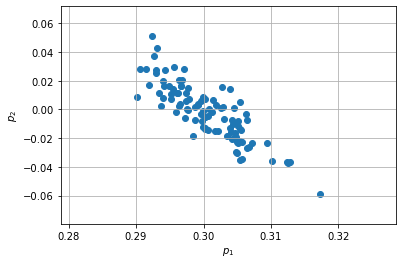

In [48]:
plt.scatter(p_res[:,0], p_res[:,1])
plt.grid()
plt.xlabel(r'$p_1$')
plt.ylabel(r'$p_2$')

In [ ]:
plt.scatter()

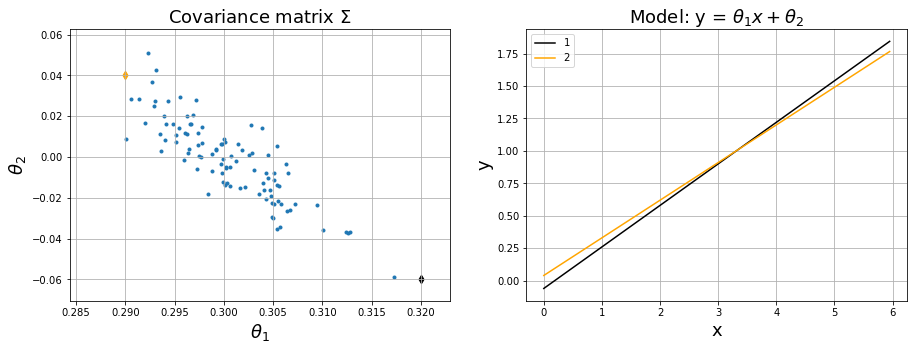

In [64]:
f, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(p_res[:,0], p_res[:,1], marker='.')
ax[0].scatter(0.32, -0.06, marker='d', color='black')
ax[0].scatter(0.29, 0.04, marker='d', color='orange')
ax[0].grid()
ax[0].set_xlabel(r'$\theta_1$', size=18)
ax[0].set_ylabel(r'$\theta_2$', size=18)
ax[0].set_title('Covariance matrix $\Sigma$', size=18)
ax[1].plot(x_data, 0.32 * x_data + (-0.06), ls='-', label='1', color='black')
ax[1].plot(x_data, 0.29 * x_data + (0.04), ls='-', label='2', color='orange')
ax[1].set_title(r'Model: y = $\theta_1 x + \theta_2$', size=18)
ax[1].set_xlabel('x', size=18)
ax[1].set_ylabel('y', size=18)
ax[1].grid()
ax[1].legend()

In [27]:
n_2d = scipy.stats.multivariate_normal(mean=[0, 0.], cov=[[5.0, 2], [2, 1]])

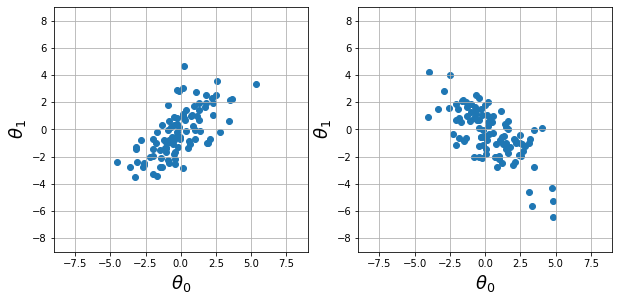

In [49]:
f, ax = plt.subplots(figsize=(10,4.5), ncols=2)
c1 = [[3.0, 2], [2, 3]]
c2 = [[3.0, -2], [-2, 3]]
cl = [c1, c2]
for i in range(2):
    n_2d = scipy.stats.multivariate_normal(mean=[0, 0.], cov=cl[i])
    rpts = n_2d.rvs(100)
    ax[i].scatter(rpts[:,0], rpts[:,1])
    ax[i].set_xlabel(r'$\theta_0$', size=18)
    ax[i].set_ylabel(r'$\theta_1$', size=18)
    ax[i].grid()
    ax[i].set_xlim(-9,9)
    ax[i].set_ylim(-9,9)

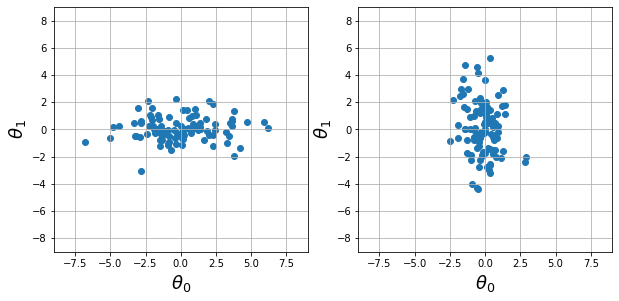

In [51]:
f, ax = plt.subplots(figsize=(10,4.5), ncols=2)
c1 = [[5, 0], [0, 1]]
c2 = [[1.0, 0], [0, 5]]
cl = [c1, c2]
for i in range(2):
    n_2d = scipy.stats.multivariate_normal(mean=[0, 0.], cov=cl[i])
    rpts = n_2d.rvs(100)
    ax[i].scatter(rpts[:,0], rpts[:,1])
    ax[i].set_xlabel(r'$\theta_0$', size=18)
    ax[i].set_ylabel(r'$\theta_1$', size=18)
    ax[i].grid()
    ax[i].set_xlim(-9,9)
    ax[i].set_ylim(-9,9)